In [2]:
import pandas as pd  
  
# Load your data into a DataFrame (if not already done)  
data = pd.read_excel('data.xlsx', parse_dates=['TIMESTAMP', 'FIRST DAY', 'INTERVENTION TIME'])  
  
# Sort the data by user ID, session ID, and timestamp  
data = data.sort_values(by=['ID', 'SESSION', 'TIMESTAMP'])  

In [3]:
# There is an extra space in some columns' name ie. 'PREVIOUS '.
data.columns = data.columns.str.strip()

In [4]:
# Concatenate navigation paths for each user/session  
data['NAVIGATION_PATH'] = data.groupby(['ID', 'SESSION'])['CURRENT'].transform(lambda x: ' -> '.join(x))  
  
# Drop duplicates to get unique paths per session  
unique_paths = data[['ID', 'SESSION', 'NAVIGATION_PATH']].drop_duplicates()  
  
# Count the frequency of each path  
path_counts = unique_paths['NAVIGATION_PATH'].value_counts()  
  
# Display the most common paths  
print("Most Common Navigation Paths:")  
print(path_counts.head())  


Most Common Navigation Paths:
NAVIGATION_PATH
Mainpage -> List of tools -> Tools: rhythm your time    643
Mainpage                                                449
List of tools -> Tools: rhythm your time                351
Mainpage -> List of tools -> Tools: step counter        312
login                                                   310
Name: count, dtype: int64


In [5]:
# Calculate session duration for each user/session combination  
session_duration = data.groupby(['ID', 'SESSION']).agg(  
    SESSION_START=('TIMESTAMP', 'first'),  
    SESSION_END=('TIMESTAMP', 'last')  
)  
  
# Calculate the duration in seconds  
session_duration['SESSION_DURATION'] = (session_duration['SESSION_END'] - session_duration['SESSION_START']).dt.total_seconds()  
  
# Calculate frequency of use (number of sessions per user)  
frequency_of_use = data.groupby('ID')['SESSION'].nunique()  
  
# Merge metrics back into the main DataFrame  
session_metrics = session_duration.merge(frequency_of_use.rename('FREQUENCY_OF_USE'), on='ID')  
  
# Calculate correlation matrix  
correlation_matrix = session_metrics[['SESSION_DURATION', 'FREQUENCY_OF_USE']].corr()  
  
print("Correlation Matrix:")  
print(correlation_matrix)  


Correlation Matrix:
                  SESSION_DURATION  FREQUENCY_OF_USE
SESSION_DURATION           1.00000          -0.05259
FREQUENCY_OF_USE          -0.05259           1.00000


In [7]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Load your data into a DataFrame (if not already done)  
data = pd.read_excel('data.xlsx', parse_dates=['TIMESTAMP', 'FIRST DAY', 'INTERVENTION TIME'])  
  
# Ensure the data is sorted by user ID, session ID, and timestamp  
data = data.sort_values(by=['ID', 'SESSION', 'TIMESTAMP'])  
  
# Calculate session duration for each user/session combination  
session_duration = data.groupby(['ID', 'SESSION']).agg(  
    SESSION_START=('TIMESTAMP', 'first'),  
    SESSION_END=('TIMESTAMP', 'last')  
)  
  
# Calculate the duration in seconds  
session_duration['SESSION_DURATION'] = (session_duration['SESSION_END'] - session_duration['SESSION_START']).dt.total_seconds()  
  
# Check for any zero or near-zero durations  
print(session_duration[session_duration['SESSION_DURATION'] <= 1.0])  
  
# Plot the distribution of session durations  
plt.figure(figsize=(10, 6))  
sns.histplot(session_duration['SESSION_DURATION'], bins=30, kde=True)  
plt.title('Distribution of Session Durations')  
plt.xlabel('Session Duration (seconds)')  
plt.ylabel('Frequency')  
plt.show()  


FileNotFoundError: [Errno 2] No such file or directory: 'your_data.csv'

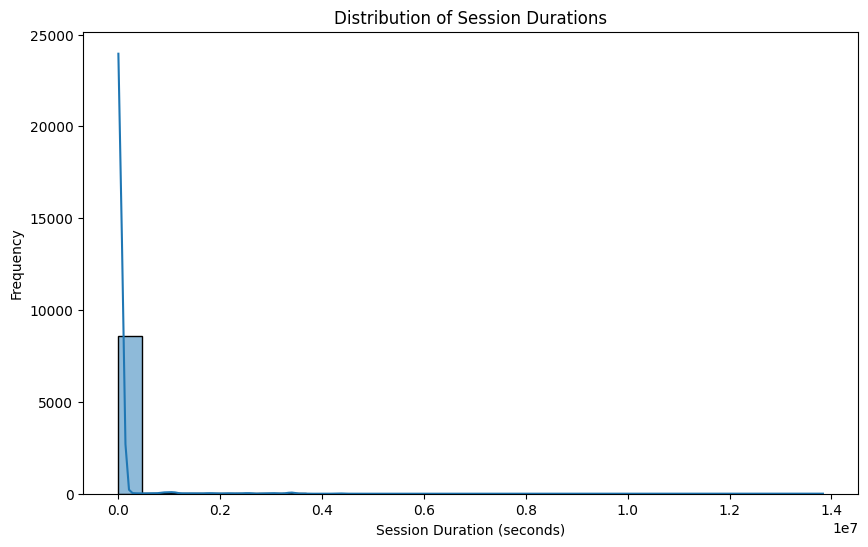

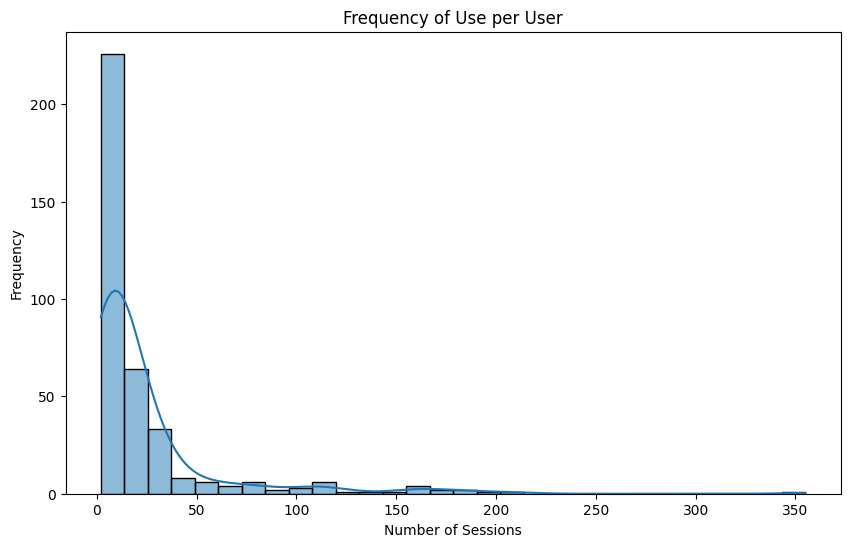

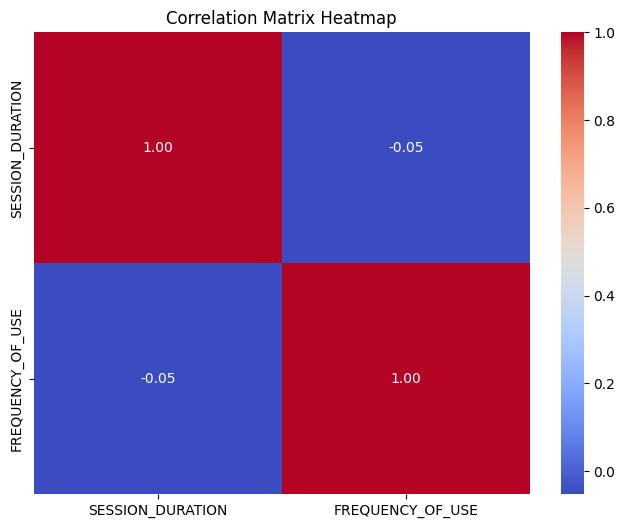

In [6]:
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Plot the distribution of session durations  
plt.figure(figsize=(10, 6))  
sns.histplot(session_duration['SESSION_DURATION'], bins=30, kde=True)  
plt.title('Distribution of Session Durations')  
plt.xlabel('Session Duration (seconds)')  
plt.ylabel('Frequency')  
plt.show()  
  
# Plot the frequency of use per user  
plt.figure(figsize=(10, 6))  
sns.histplot(frequency_of_use, bins=30, kde=True)  
plt.title('Frequency of Use per User')  
plt.xlabel('Number of Sessions')  
plt.ylabel('Frequency')  
plt.show()  
  
# Visualise correlations using a heatmap  
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  
plt.title('Correlation Matrix Heatmap')  
plt.show()  
